# 1.3.3_preprocessed_text

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split=(tfds.Split.TRAIN, tfds.Split.TEST), 
    as_supervised=True, 
    with_info=True
)

Shuffling and writing examples to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCU3FJZ/imdb_reviews-train.tfrecord
Shuffling and writing examples to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCU3FJZ/imdb_reviews-test.tfrecord
Shuffling and writing examples to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCU3FJZ/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print(f"Vocabulary size: {encoder.vocab_size}")

Vocabulary size: 8185


In [6]:
sample_string = "Hello TensorFlow"

In [7]:
encoded_string = encoder.encode(sample_string)
encoded_string

[4025, 222, 6307, 2327, 4043, 2120]

In [8]:
original_string = encoder.decode(encoded_string)
original_string

'Hello TensorFlow'

In [11]:
for ts in encoded_string:
    print(f"{ts:4} ---> {encoder.decode([ts])}")

4025 ---> Hell
 222 ---> o 
6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow


In [15]:
for train_example, train_label in train_data.take(1):
    print('Encoded text:', train_example[:10].numpy())
    print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [16]:
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [19]:
BUFFER_SIZE = 1000
train_batches = train_data.shuffle(BUFFER_SIZE).padded_batch(32, train_data.output_shapes)
test_batches = test_data.shuffle(BUFFER_SIZE).padded_batch(32, train_data.output_shapes)

In [20]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("Label shape:", label_batch.shape)

Batch shape: (32, 1109)
Label shape: (32,)
Batch shape: (32, 958)
Label shape: (32,)


In [21]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=30)

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6834 - accuracy: 0.6239 - val_loss: 0.6634 - val_accuracy: 0.6802
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6217 - accuracy: 0.7552 - val_loss: 0.5940 - val_accuracy: 0.7188
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5407 - accuracy: 0.8077 - val_loss: 0.5191 - val_accuracy: 0.7979
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4733 - accuracy: 0.8409 - val_loss: 0.4715 - val_accuracy: 0.8198
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4207 - accuracy: 0.8626 - val_loss: 0.4193 - val_accuracy: 0.8604
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3803 - accuracy: 0.8756 - val_loss: 0.4156 - val_accuracy: 0.8542
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3473 - accuracy: 0.8871 - val_loss: 0.3878 - val_accuracy: 0.8479
Epoch 

In [25]:
loss, accuracy = model.evaluate(test_batches)
print(f"Loss: {loss}, accuracy: {accuracy}")

    782/Unknown - 4s 5ms/step - loss: 0.3332 - accuracy: 0.8761Loss: 0.3332466099820936, accuracy: 0.8760799765586853


In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

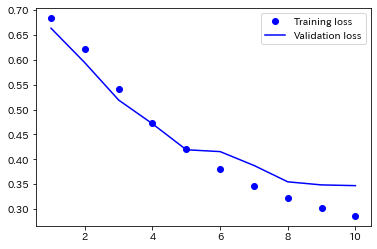

In [31]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()

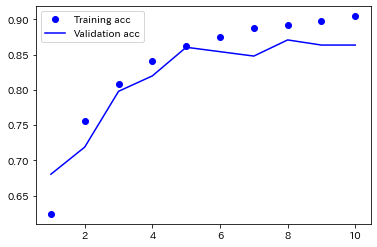

In [33]:
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()